In [1]:
import numpy as np
import dask.array as da

In [2]:
xda=da.ones((100,100),chunks=(50,50))
xda

dask.array<ones_like, shape=(100, 100), dtype=float64, chunksize=(50, 50), chunktype=numpy.ndarray>

In [3]:
xda.compute()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [4]:
data=np.random.rand(50*365*24*60*60)

In [5]:
%time data_sum = data.sum()
data_sum

CPU times: user 886 ms, sys: 3.44 ms, total: 890 ms
Wall time: 890 ms


788391854.3155539

In [6]:
data_dask=da.from_array(data, chunks=len(data)//8)

In [7]:
data_dask

dask.array<array, shape=(1576800000,), dtype=float64, chunksize=(197100000,), chunktype=numpy.ndarray>

In [8]:
sum_dask_dag=data_dask.sum()

In [9]:
%time sum_dask=sum_dask_dag.compute()
sum_dask

CPU times: user 2.94 s, sys: 15 ms, total: 2.95 s
Wall time: 379 ms


788391854.3155606

In [10]:
import xarray as xr

In [11]:
mur_sst=xr.open_zarr('https://mur-sst.s3.us-west-2.amazonaws.com/zarr-v1',consolidated=True)

In [12]:
mur_sst

,Array,Chunk
Bytes,15.19 TiB,123.53 MiB
Shape,"(6443, 17999, 36000)","(5, 1799, 3600)"
Count,141791 Tasks,141790 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,15.19 TiB,123.53 MiB
Shape,"(6443, 17999, 36000)","(5, 1799, 3600)"
Count,141791 Tasks,141790 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [32]:
ds=mur_sst.analysed_sst
mask_lon=(ds.lon >= -71.5 ) & ( ds.lon <= -68)
mask_lat=(ds.lat >= 41) & ( ds.lat <=43 )
# mask_time=(ds.time >= '2002-06-01T09:00:00:00.000000000') & ( ds.time <= '2002-06-02T09:00:00:00.000000000'  )
tr=slice('2002-06-01', '2002-06-30')
import dask
with dask.config.set(**{'array.slicing.split_large_chunks':False}):
    ds_masked=ds.where(mask_lon & mask_lat, drop=True).sel(time=tr)


In [40]:
sst=ds_masked.data[0,:,:].compute()

In [42]:
import matplotlib.pyplot as plt
import matplotlib


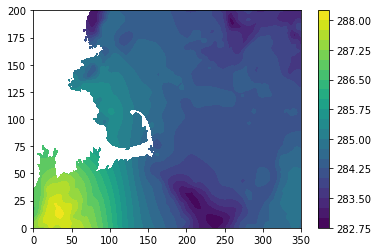

In [47]:
plt.contourf(sst,20);plt.colorbar()